Written in collaboration with <a href = "https://www.linkedin.com/in/coenvansoest/">Coen van Soest</a>, for the completion of the course *Methods: Python Programming for Economists*, awarded grade of 10/10.

# **Paper**

<p align="justify"> The paper we choose to discuss is: <a href = "https://www.aeaweb.org/articles?id=10.1257/aer.20190623">Artificial intelligence, Algorithmic Pricing and Collusion</a>, published in 2020 on the American Economic Review Journal by Emilio Calvano, Giacomo Calzolari, Vincenzo Denicolò and Sergio Pastorello.

<p align="justify">In the paper the researchers construct two Q-learning algorithms as suppliers in a price setting (Bertrand) competition environment. The goal is to see whether the equilibrium price reached by the two algorithms is higher than the Bertrand Nash Equilibrium, in other words: do the algorithms collude? And if so what would the policy implications be?
The main conclusions are that the two price setting Q-learning algorithms do systematically learn to collude and that collusion is enforced by punishment with a finite duration.

<p align="justify">This has important policy implications as many firms today adopt systems of predictive pricing, thus regulation on tacit collusion should be less lenient. Tacit collusion among human decision makers is very difficult to achieve, for algorithms this is less improbable. The pro of algorithms however is that with new anti-trust policy we could replicate the algorithms and simulate the environment that they act in, to see whether collusion happens among the algorithms in question. </p>

# **Research Question & Motivation**

<p align="justify">The original research question is as follows: <b>Do we see collusive prices emerge when the two algorithms compete?</b> If so, is it because algorithms collude in the sense of deterring price cuts (i.e. is it because they act through collusion strategies like punishing deviation)?

<p align="justify">The extension to the research question we introduce is: <b>Does collusion remain when we increase competition in the market?</b>

<p align="justify">We believe that this is a relevant addition, as the market modelled in the original paper is not truly representative of real market scenarios, as the presence of two (identical) agents competing against each other is already an alarming case for competition authorities. While the introduction of more players better mimics a functional market in which tacit collusion may happen even under an authority's supervision. </p>

# **Preview of the Answer**

<p align="justify"> We start with solving the Bertrand competition with 1 competitor to find the monopoly price. This is necessairy to determine a upper limit to which the Q-learning alogrithm can set its price, and also to determine how much the algorithms collude. The monopoly price will amount to 1.2618.

<p align="justify"> After that we use our self-build Q-learning algorithms to play in a Bertrand competition model. The paper finds collusion when 2 algorithms compete in a Bertrand market, meaning they reach a price above the Bertrand Nash equilibrium (above $P=MC$). We extend the model with respect to the number of players, we run the Bertrand competition with 3 and with 4 players.

<p align="justify"> We find no collusion when 2 algorithms compete, this clashes with the outcome from the paper. Reasons for this will be discussed in the conlcusion. Furthermore, for 3 players we do find a collussion, shown by average prices being well above 1. Extending the model even further to 4 players we do not find collussion anymore. </p>

# **Main Assumptions**

<p align="justify"> We choose to limit the number of prices (actions) the agents can set as to not have an exponentially increasing Q-Matrix that would be too computationally demanding in the case of, for example, a sequence of continous prices. We also assume a constant $\epsilon$-greedy strategy, as opposed to the original paper, to reach an optimal exploration-exploitation trade-off even with a limited amount of repetitions.

<p align="justify"> Furthermore, the original paper has the following assumptions:</p>

* The firms in the market are homogenous and symmetrical
* Demand is indifferent on firms, meaning that demand will be split evenly in case of equal prices

<p align="justify"> Their assumption of a strict duopoly is the one we will relax in our extension. </p>


# **Model in the Paper**

>**Economic Enviroment**

<p align="justify"> The decision-makers', i.e., the pricing agents, decision problem is to maximize their revenue streams give by the following function:

<center> $E\left[\sum_{t=0}^{\infty} \delta^t \pi_t\right]$ </center>

<p align="justify"> Where, $\pi_t$ is the profits per period, and $\delta$ is the discount factor for future periods.

<p align="justify"> More precisely, $\pi_t$ is equal to $(p_t-c_t)q_t$, with the logit demand function given by:

<center> $q_{i,t} = \frac{e^{\frac{a_i - p_{i,t}}{\mu}}}{\sum_{j=1}^{n} e^{\frac{a_j - p_{j,t}}{\mu}} + e^{\frac{a_0}{\mu}}}$ </center>

Where:


*   $a$ are product quality indexes that capture vertical differentiation, with product 0 being the outside good
*   $\mu$ is an index of horizontal differentiation
*   $n$ is the number of firms in the market

The authors initialize the enviroment as follows: $n =2; c_i=1, a_0 = 0, \mu= \frac{1}{4}, \delta=0.95$.




>**Q-Learning Model**


<p align="justify"> From the economic enviroment described above, the dynamic programming problem is based on the Bellman's value function:
<center>$V(s) = \max_{a \in A} \left\{ E[\pi \mid s, a] + \delta \cdot E[v(s') \mid s, a] \right\}$ </center>

<p align="justify"> from which we can obtain the Q-function:
<center> $Q(s, a) = E[\pi \mid s, a] + \delta \cdot E\left[\max_{a' \in A} Q(s', a') \mid s, a\right]$ </center>

<p align="justify"> In our experiment this function allows the algorithms to choose the action, as the price to set, based on the state given by the profits (prices of all agents) obtained in the previous period.

<p align="justify"> Because we are working with reinforcement learning we need an updating rule for the inital Q-Matrix, which goes as follows:
<center>$Q_{t+1}(s, a) = (1 - \alpha)Q_t(s, a) + \alpha[\pi_t + \delta \max_{a \in A} Q_t(s', a)]$ </center>

<p align="justify"> $Q_{t+1}(s,a)$ is a convex combination of the previous value and the current reward plus the discounted value of the state that is reached next. The weight $α ∈ [0,1]$ is called the learning rate.

<p align="justify"> The Q-matrix's default values are calculated as follows:
<center>$Q_{i,0}(s, a) = \frac{\sum_{a_{-i} \in A^{n-1}} \pi_i(a_i, a_{-i})}{(1 - \delta)|A|^{n-1}}$ </center>

<p align="justify"> Important to note is that a Q-learning algorithm explores with probability: $\epsilon_t = e^{-\beta t}$, but as previously mentioned we will set the exploration rate equal to a constant value. 


   






# **Python Code**


In [1]:
import sympy as sym
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import random
import itertools
import math
import pandas as pd
import pymc3 as py


* <b> Solving the Market Equilibria

<p align="justify"> We are going to start with finding the monopoly price using python. We already know the Bertrand Nash equilibrium price which is $p = MC$ so 1 in our case.

<p align="justify"> First we define $e$ since thats a necessairy number for the demand function as given above. </p>

In [2]:
e = math.e

<p align="justify"> Next we define the market demand function. We give most parameters a default value ($\alpha_0, \alpha, \mu$ and $n$) as given by in the original paper.
We leave $p$ to fill in, giving us a function with demand being dependend on $p$. </p>

In [30]:
def d(p, a0=0, μ=0.25, a=2, n=2):
  return e**((a-p)/μ)/(n*(e**(a-p/μ))+e**(a0/μ))

<p align="justify"> Now that we have the demand function we can create the profit function, which intuitively is $(p-c)Q$, where $Q$ is the demand function we just defined.
Hence, after pluggining the same parameters as above, we can define the profit function. </p>

In [31]:
def profit(p, a0=0, μ=0.25, a=2, n=2, c=1):
  return (p-c)*d(p, a0, μ, a, n)

<p align="justify">We optimize the profit function with `sp.optimize.minimize`, putting the minus before the function making the maximum the minimum.

<p align="justify">In the output we can find the $x$ at which the maximum profit is reached. </p>

In [32]:
wholemonopolyprice = sp.optimize.minimize(lambda p: -profit(p, a0=0, μ=0.25, a=2, n=1, c=1), x0=0, method = "BFGS")

<p align="justify"> We extract the $x$ from `sp.optimize.minimze` output to make it clear and making it possible to print it. </p>

In [33]:
monopolyprice= wholemonopolyprice.x

<p align="justify"> Finally we do a simple `print` code, to visualize our results as strings. </p>



In [34]:
print(f"The monoply price amounts to {monopolyprice[0]}")
print(f"This price gives a demand of {d(monopolyprice)[0]}")
print(f"And a profit of {profit(monopolyprice)[0]}")

The monoply price amounts to 1.261869550805559
This price gives a demand of 17.493103107778094
And a profit of 4.580911053029179


<p align="justify"> We can also visualize the demand and profit functions, and how they evolve with respect to price, graphically. </p>

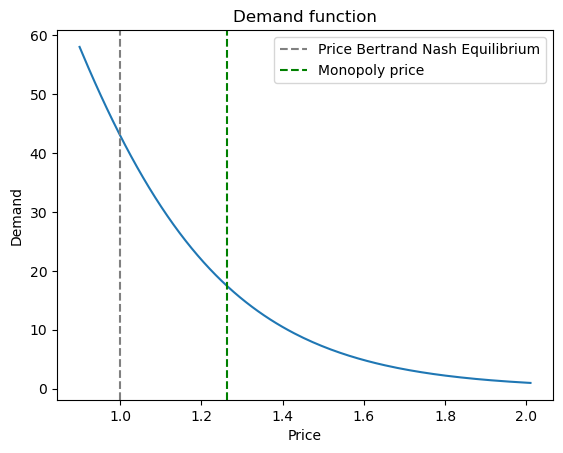

In [35]:
#We define the stepsize and limits op P as input for demand, we make 150 different P's.
pointsp = np.linspace(0.9,2.01,150)

plt.plot(pointsp, d(pointsp)) #We plot the demand function against P creating the blue line.
plt.axvline(x=1, color='gray', linestyle='--', label="Price Bertrand Nash Equilibrium") #This creates the Bertrand Nash Equilibrium price in a straight gray line for clarity.
plt.axvline(x=1.261869550805559, color="green", linestyle="--", label="Monopoly price") #This creates Monopoly price in a straight green line for clarity.
plt.legend() #shows which line belongs with what price.
plt.xlabel("Price") #Names the x-axis.
plt.ylabel("Demand") #Names the y-axis.
plt.title("Demand function") #Gives a title to the graph.
plt.show(); #Prints the graph.

<p align="justify"> As we can see in the figure above demand declines as price rises, so there is a negative relationship between the two. </p>

<p align="justify"> Now the profit function. </p>

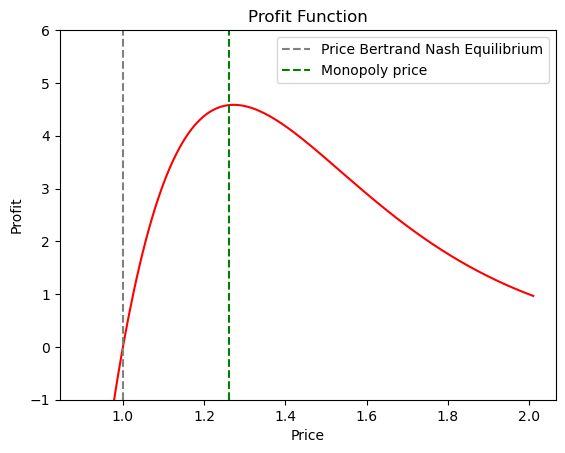

In [36]:
#We use the same amount of prices as before, the same stepsize between prices with the same limits.
plt.plot(pointsp, profit(pointsp), color="red") #We plot the profit function against P creating the red line.
plt.axvline(x=1, color='gray', linestyle='--', label="Price Bertrand Nash Equilibrium") #This creates the Bertrand Nash Equilibrium price in a straight gray line for clarity.
plt.axvline(x=1.261869550805559, color="green", linestyle="--", label="Monopoly price") #This creates Monopoly price in a straight green line for clarity.
plt.legend() #shows which line belongs with what price.
plt.ylim(-1,6)
plt.xlabel("Price") #Names the x-axis.
plt.ylabel("Profit") #Names the y-axis.
plt.title("Profit Function") #Gives a title to the graph.
plt.show(); #Prints the graph.

<p align="justify"> In the figure above we see that profit hits 0 at price = 1, this makes sense since here $p = MC$, above this number supliers will enter the market. Profit increases untill the monopoly price that has been calculated before </p>

* **The Q-Learning Algorithms**

<p align="justify"> To simulate the market we must now construct the Q-Learning Algorithms which the players (firms) use to decide which price to set. As part of our extension we make this market simulation variable on the numbers of players, in orde to understand the results of the market with more or less competition, and if collusion remains sustainable.

<p align="justify"> We start by altering the previously defined demand and profit functions to make them depedent on a non-fixed amount of players. Hence the variable <code>Num_Players</code>. </p>

In [3]:
def demand(p, Num_Players, a_0=0, μ=0.25, a=2):
    return math.e**((a - p)/μ)/(Num_Players*(math.e**(a-p/μ))+math.e**(a_0/μ))

def π(p, a_0=0, μ=0.25, a=2, c=1):
    return (p-c)*demand(p, a_0, μ, a)

<p align="justify"> We now initialize the Q-Matrix, i.e. the matrix in which the players will store the results from the various game repetitions. The rows of this matrix are determined by all possible states of the game, which in our case are all the possible price combinations, and the columns are all the price options. As we briefly mentioned above, to reduce the computing power demand we limit the price options to a list of four, with the code <code>actions = [1, 1.100, 1.250, 1.262]</code>, these prices are chosen as follows: Bertrand Nash Equilibrium (1), Monopoly Price (rounded up: 1.262) and two in between values which can still be considered as collusion as they are above the compeitive outcome.

<p align="justify"> The second function <code>get_state_index()</code> was suggested by ChatGPT when debugging our code, it ensures that a set of actions (prices) is then covertend into an actual index of the matrix by returning a hash value. This index will then be used in the learning proces to indentify which element of the Q-Matrix to update. </p>

In [4]:
def initialize_q_matrix(Num_Players):
    actions = [1, 1.100, 1.250, 1.262] #Specify possible actions
    states = list(itertools.product(actions, repeat=Num_Players)) #Specify all possible list as a combination of all actions per player
    state_to_index = {state: index for index, state in enumerate(states)} #Create a dictionary to transform the states into indexes of the matrix
    num_states = len(states)
    num_actions = len(actions)
    Q_matrix = np.zeros((num_states, num_actions)) #Construct the starting Q-Matrix as a Null Matrix
    return Q_matrix, states, num_states, num_actions, actions

def get_state_index(state, num_states):
    string_state = ",".join(map(str, state))
    return hash(string_state) % num_states  # Ensure the index is within bounds

<p align="justify"> We then construct the function for the decision rule, this function draws a random number between 0 and 1, if that number is below the given exploration rate, the player will choose an action randomly, otherwise it will choose the action that, in the given state (<code>index_of_state</code>) gives the highest return. </p>

In [5]:
def choose_action(exp_rate, actions, Q_matrix, index_of_state):
    if np.random.uniform(0, 1) < exp_rate:
        return random.choice(actions)
    else:
        return actions[np.argmax(Q_matrix[index_of_state, :])]

<p align="justify"> Now we need to define the function that calculates the returns in each iteration, which in our case are profits from the competition. More specifically we impose the rule that, if a player chooses the highest price it will have zero profits as no one will buy from him, otherwise if a single player has the lowest price then it will obtain profits as calculated with the previous profit function (<code>π</code>), and if more than one player share the lowest price, profits will be evenly split between them. These returns are then stored per player. </p>

In [6]:
def calculate_profits(current_state, Num_Players):
    profits = []
    for n in range(Num_Players):
        player_price = current_state[n]
        min_price = min(current_state)
        max_price = max(current_state)

        if player_price == max_price:
            profits.append(0)
        elif player_price == min_price and current_state.count(min_price) == 1:
            profits.append(π(p=player_price))
        elif player_price == min_price and current_state.count(min_price) > 1:
            lowest_price_players = [index for index, price in enumerate(current_state) if price == min_price]
            num_lowest_price_players = len(lowest_price_players)
            equal_share_profit = π(p=player_price) / num_lowest_price_players
            profits.append(equal_share_profit)
    profits += [0] * (Num_Players - len(profits))
    return profits

<p align="justify"> Next, as we have the actions, the states and the returns, we can then construct the updating rule for the Q-Matrix, which follows the equation that we previously reported: </p>
<center>$Q_{t+1}(s, a) = (1 - \alpha)Q_t(s, a) + \alpha[\pi_t + \delta \max_{a \in A} Q_t(s', a)]$ </center>


In [7]:
def update_q_matrix(Num_Players, α, δ, Q_matrix, current_state, subj_state, next_state, profits):
    for n in range(Num_Players):
        reward = profits[n]
        #Find the new position of the Q-Matrix to update
        Q_matrix[get_state_index(subj_state, len(Q_matrix)), n] =(
            (1 - α)*Q_matrix[get_state_index(subj_state, len(Q_matrix)), n] + α*(reward + δ * np.max(Q_matrix[get_state_index(next_state, len(Q_matrix)), :]))) #Assign new value as from equation
    return Q_matrix

<p align="justify"> We now have all the steps for our learning algorithms. We will include all the functions into a single function to allow for a repetition over both iterations and episodes. In this function we also arbitrarly set the exploration rate at $0.05$ as to have a good trade-off bertween learning and exploitation even with a lower number of iterations, making it less computationally demanding. We also set-up the storing of the prices over episodes and the overall average price over time, which we will need in the next cell for visualization purposes (more on this later). </p>

In [8]:
def run_game(Num_Players, Q_matrix, num_states, actions, n_iterations, n_episodes, δ, α):
    profit_over_time = [[] for _ in range(Num_Players)]
    prices_over_episodes = [[] for _ in range(Num_Players)]
    cumulative_prices = [0] * Num_Players #The term * Num_Players allows for the list to be the correct size wrt the number of players of choice
    average_prices_over_time = [[] for _ in range(Num_Players)]

    for t in range(n_episodes):
        for i in range(n_iterations):
            exp_rate = 0.05
            index_of_state = 1
            current_state = []

            #Learning Process
            for n in range(Num_Players):
                p = choose_action(exp_rate, actions, Q_matrix, index_of_state)
                current_state.append(p)
                index_of_state = get_state_index(tuple(current_state), num_states)

            profits = calculate_profits(current_state, Num_Players)
            Q_matrix = update_q_matrix(Num_Players, α, δ, Q_matrix, current_state, (n,) + tuple(current_state) + (current_state[n],), tuple(current_state), profits)

        #Record Prices Played (Visualization)
        for n in range(Num_Players):
            prices_over_episodes[n].append(current_state[n])

        #Record Average Prices Played (Visualization)
        # Update cuμlative prices
        for n in range(Num_Players):
            cumulative_prices[n] += current_state[n]

        for n in range(Num_Players):
            prices_over_episodes[n].append(current_state[n])
            average_prices_over_time[n].append(cumulative_prices[n] / (t + 1))  # Calculate average over time

    return Q_matrix, prices_over_episodes, average_prices_over_time

<p align="justify"> Hence, below we have the plotting functions. For each player we first plot the prices, or actions, taken over each episode. This is useful in showing if the algorithms are able to converge to a certain strategy over time. The second graph plots how the average prices taken by a single player change over time, this again is useful in showing how behaviour changes over time and if players settle on certain market outcomes, such as collusion or not. </p>

In [9]:
def plot_prices(Num_Players, prices_over_episodes, average_prices_over_time, actions):
    fig, axes = plt.subplots(Num_Players, 2, figsize=(12, 12))

    for n in range(Num_Players):
      #Prices in the Last 100 Periods
        axes[n, 0].plot(prices_over_episodes[n], label=f'Player {n + 1}')
        axes[n, 0].set_xlabel('Episode')
        axes[n, 0].set_ylabel('Price')
        axes[n, 0].set_title(f'Prices Over Periods - Player {n + 1}')
        axes[n, 0].set_yticks(actions)
        axes[n, 0].legend()

       #Average Price Over Time
        axes[n, 1].plot(average_prices_over_time[n], label=f'Player {n + 1}')
        axes[n, 1].set_xlabel('Episode')
        axes[n, 1].set_ylabel('Average Price')
        axes[n, 1].set_title(f'Average Price Over Time - Player {n + 1}')
        axes[n, 1].legend()

    plt.tight_layout()
    plt.show()

<p align="justify"> The final step is to put everything together into a single function, which can be easily called and will simulate the whole market, with this function we are also able to choose the number of players we want to compete in the market. It is also possible to alter the number of episodes and iterations for which the simulation runs, as well as the exploration rate and the learning step size, but we chose to set them to standard values. The function will initialize the enviroment, play the game and plot the results, as described above. </p> 

In [10]:
def market_simulation(Num_Players, n_episodes=1000, n_iterations=1000, exp_rate=0.05, α=0.15, δ = 0.95):
  ''' Dynamic Market Simulation of Algorithmic Pricing in a Bertrand Competition'''

  #Initialize enviroment
  Q_matrix, states, num_states, num_actions, actions = initialize_q_matrix(Num_Players)

  #Simulate competition
  Q_matrix, prices_over_episodes, average_prices_over_time = run_game(Num_Players, Q_matrix, num_states, actions, n_iterations, n_episodes, δ, α)

  #Present results
  plot_prices(Num_Players, prices_over_episodes, average_prices_over_time, actions)

  return Q_matrix

<p align="justify"> <em>We would like to note one limitation of our work. As we have chosen, for feasibility purposes, to limit the number of prices to a determined set, it seems like our function will not work with a number of players greater than the number of prices, most likely as it will collide with the size of the Q-Matrix. We belive that this could be resolved with having a set of continous prices within the Perfect Equilibrium and Monopoly prices, but this also exceeds the scope of our work and the assignments. Anyhow, for learning sake, we would greatly appreciate any feedback on this issue. </em> </p>

<p align="justify"> <em> Moreover, all the displyed code is the result of our own work. We obviously gathered information on the web and from other classess but we never incorporated other's code into our own. For example, we took inspiration from the following <a href = "https://github.com/matteocourthoud/Algorithmic-Collusion-Replication"> simulation of the paper</a>, but none of it was used in our code. </em> </p>

* **Running the Simulation**

<p align="justify"> In the left graphs we see the price choices the players make. The outliers up are the most likely exploration choices.<br> 
    In the right graphs we see the average price over time which can be defined as close to 1. Therefore it can be said that we do not see collusion<br>
    The matrix below represents the Q-matrix, according to which the algorithms make their choices. </p>

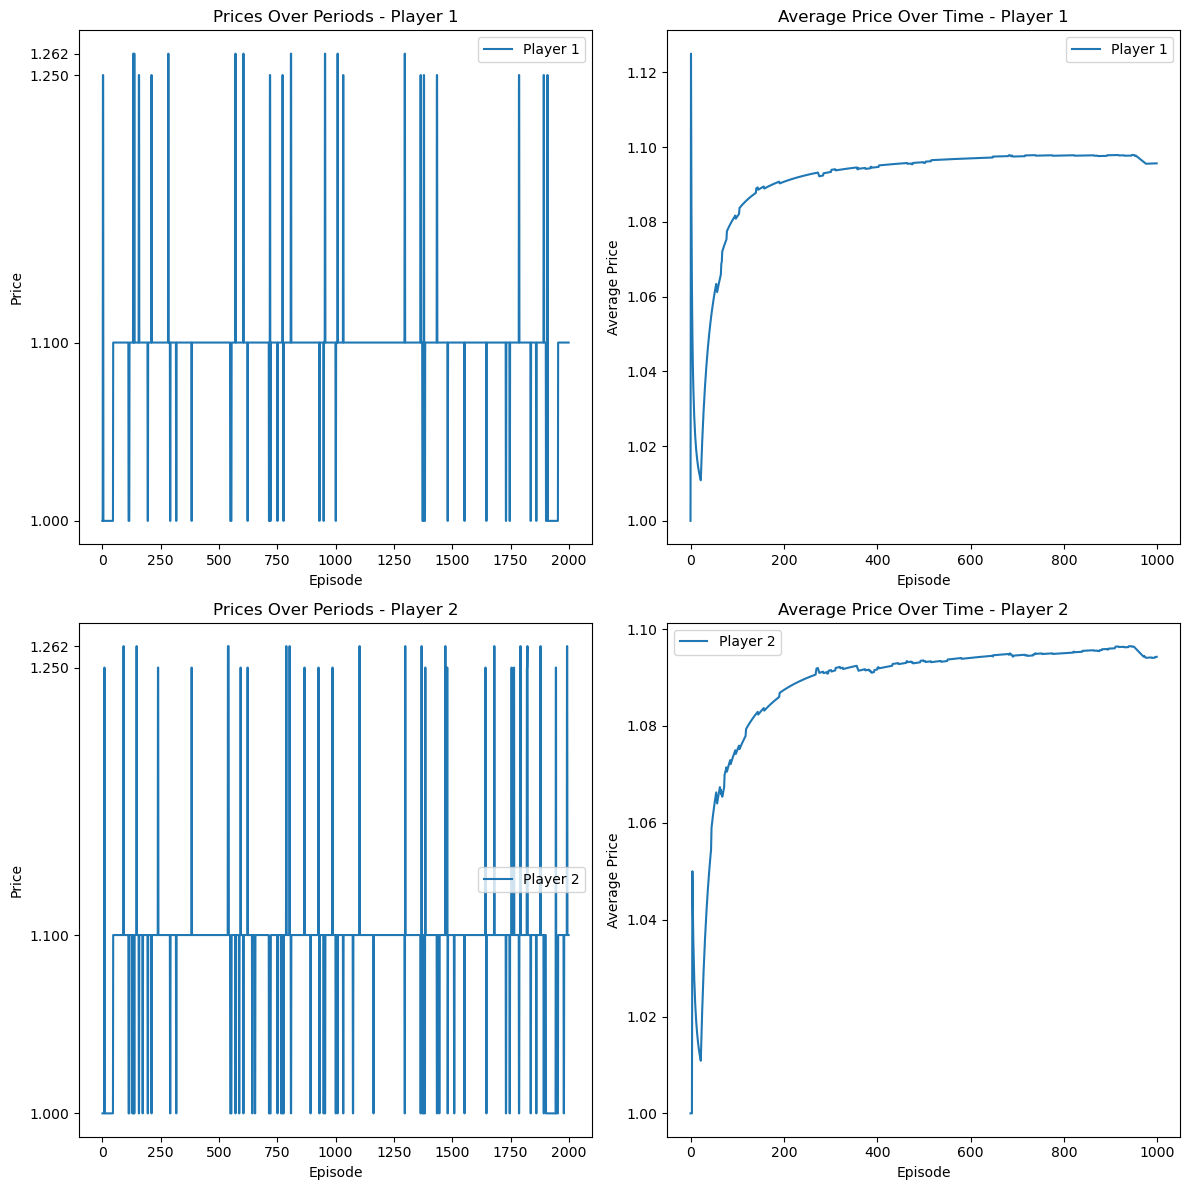

array([[0.        , 0.        , 0.        , 0.        ],
       [0.10392804, 0.10813423, 0.        , 0.        ],
       [0.13840306, 0.        , 0.        , 0.        ],
       [0.09859828, 0.09859828, 0.        , 0.        ],
       [0.2368604 , 0.09807012, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.05487468, 0.07654572, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.13148291, 0.13148291, 0.        , 0.        ],
       [0.13148291, 0.13148291, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.26988598, 0.13148291, 0.        , 0.        ],
       [0.09366762, 0.09366762, 0.        , 0.        ]])

In [11]:
market_simulation(2)

<p align="justify"> The same as formerly said can be said about these graphs and matrix, only this time it for a market with 3 players. We do not see collusion here. </p>

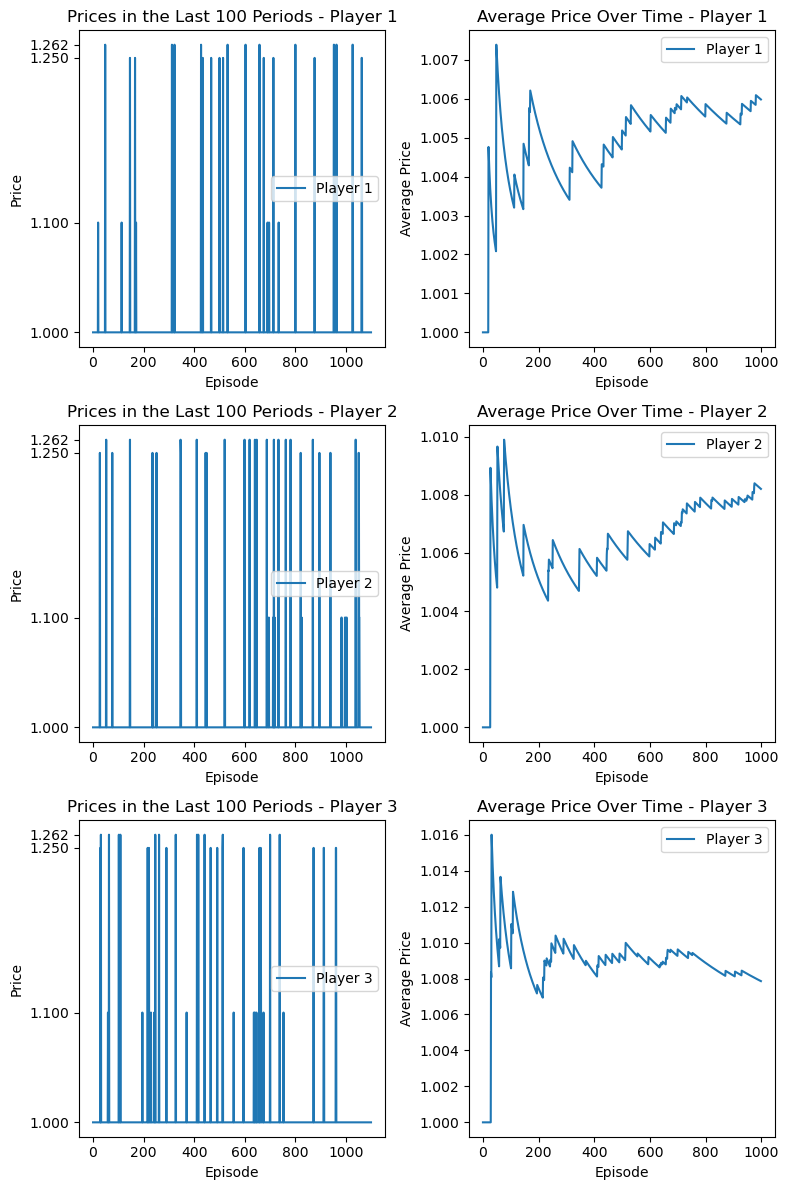

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [1.00514069e-003, 9.78630498e-004, 9.78630498e-004,
        0.00000000e+000],
       [0.00000000e+000, 1.03802298e-002, 1.18594126e-002,
        0.00000000e+000],
       [0.00000000e+000, 6.61557999e-002, 0.00000000e+000,
        0.00000000e+000],
       [3.51586461e-002, 3.65070597e-002, 3.51586461e-002,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [2.90288650e-002, 2.90288596e-002, 2.90288650e-002,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
      

In [46]:
market_simulation(3)

<p align="justify"> Again we can define it the same as before, only this time for 4 players. We don't see collusion in a market with 4 players either. </p>

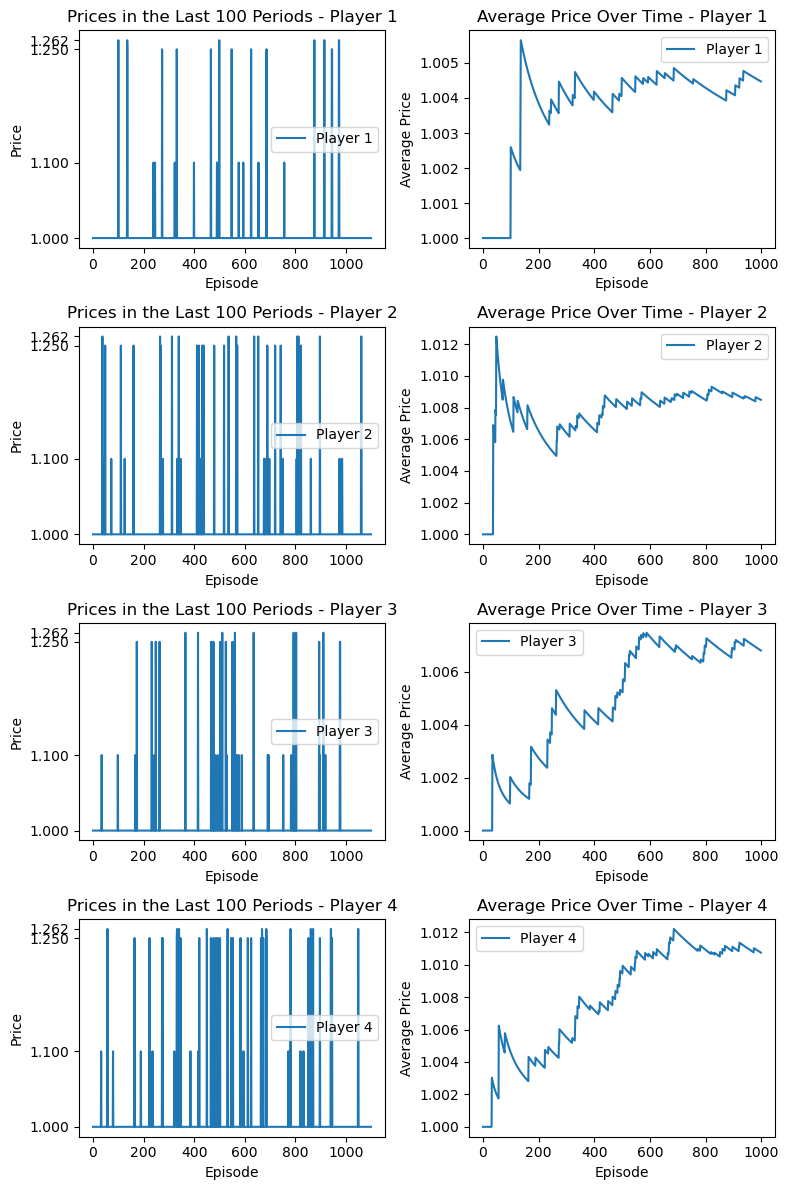

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [47]:
market_simulation(4)

# **Discussion and Conclusion**

<div style='text-align: justify;'>
Concluding we see some very interesting results, even if different from the paper's research we recreated. When we let 2 Q-Learning Algorithms (players) compete we see that they reach an average price slightly above $1$ or in other words slightly above the marginal costs. The slight deviation up can be explained by the exploration rate ($ϵ$-greedy strategy) of $5%$ in which the algorithms make a random choice instead of the one with the highest Q-score in the matrix. This result is different from the result in the paper by Calvano et al., we will return later to the reasons why it is different, but different does not mean wrong. The lack of collusion is in agreement with the theoretical outcome of a Bertrand competition, namely that products will be sold at $P=MC$. Therefore the outcome of the algorithms is theoretically correct.<br>
    <br>
We extend the model by introducing more players. The results show expected findings. As can be seen in the figures the average prices used by the 3 algorithms reach an outcome not significantly different from 1. This in other words shows that the algorithms are not colluding, since they reach the theoretical price that would be used in a Bertrand competition being $P=MC$.<br>
    <br>
When we extend to 4 players we see that the average price drops again to very close to 1. This shows that colluding no longer happens among 4 players. From a behavioral point of view that makes sense as colluding becomes more difficult when the amount of players increases.<br>
    <br> 
The results for 3 and 4 players are expected since colluding becomes more difficult as more players join in, so if collusion is not reached with 2 players then it makes sense that it is not reached with 3 or 4 players either.<br>
    <br>
We recreated the research by building our own Q-learning system. We do this for several reasons. The most important one is computational power. The paper we recreate runs 1 billion episodes with 150 different prices that the algorithms can pick. We do not possess the systems to replicate that so instead we use 1000 episodes with 4 different prices including the monopoly and the zero-profit price. Besides that we didn't have access to the Q-learning algorithms used by Calvano et al. so we built our own from "scratch" following the models given in the paper. Hence why we have chosen a different ϵ-greedy strategy, in other words exploration rate, namely a constant one of 0.05 as which has the effect mentioned before.<br>
    <br>  
Results from running the algorithms are interesting, but also specific to the environment and Q-learning algorithms we created and use. Further research, especially with more computational power, would be valuable. </div>
